 # Taller 2: Pandas

---
**Nombre**: Samuel Fernando Mesa Giraldo

**Fecha**: 4 de abril de 2021  

---


Actividades a desarrollar:

1. Diga qué índices serían pertienentes tener y pongalos.

2. Elimine registros que tengan NA en la columna "pm2.5"

3. Realice un describe de todas las variables por año. Además de realizar un gráfico como boxplot con el que pueda comparar los resultados dados.

4. Realice un gráfico de disperción de las variables "pm2.5" y "TEMP" con título, labels apropiados y color rojo para los datos. Describa: ¿Qué se puede inferir de dicho gráfico?

5. Calcule la probabilidad de encontrar en la Base de datos el valor de pm2.5 encima de 120

6. Para finalizar, agrupe por año el valor de la variable "pm2.5", calcule el promedio y ordene la base de datos de manera ascendente por el promedio.

## Descripción del conjunto de los datos

Enlace Web de los datos: https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

**Resumen**:  Conjunto de datos metereológicos por hora del material particulado de PM2.5 de la embajada de EEEUU en Pekin.

Los atributos son:

* **No**: número de fila
* **year**: año del dato
* **month**: mes del dato
* **day**: día del dato
* **hour**: Hora del dato
* **pm2.5**: Concentracción de PM2.5 (ug/m^3)
* **DEWP**: Punto de rocío (â„ƒ)
* **TEMP**: Temperatura (â„ƒ)
* **PRES**: Presión (hPa)
* **cbwd**: Dirección del viento combinada
* **Iws**: Velocidad del viento acumulada (m/s)
* **Is**: Horas de nieve acumuladas
* **Ir**: Horas de lluvia acumuladas

In [3]:
## Importar librerias y módulos

import pandas as pd
import seaborn as sbn
from copy import deepcopy
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

In [4]:
## Importar los datos directamente del enlace Web

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv", header=0)

pd.options.display.max_columns = None

In [5]:
## Algunas salidas correctamenete de los datos y describir los tipos de campos

dims_df = deepcopy(df.shape)
print("Dimensiones del Data Frame es: ", df.shape)
display(df.info())

Dimensiones del Data Frame es:  (43824, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


None

In [6]:
## Algunas salidas correspondiente al conjunto de datos

df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [7]:
## Describir los datos con algunas estadísticas simples

df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [8]:
## Concatenar year-month-day-hour para generar un campo con tipo fecha

def cambiar_formato_hora(hora):
    if hora < 10:
      hora_str = "0{}".format(hora)
    else:
      hora_str = "{}".format(hora)

    return hora_str

df["fecha"] =  pd.to_datetime(
      df['year'].map(str) + "-" + 
      df['month'].map(str) + "-" + 
      df['day'].map(str) + " " + 
      df['hour'].map(cambiar_formato_hora), 
      format="%Y-%m-%d %H"
    )

# Asignar el index a la fecha

df = df.set_index("fecha")

### **Rta Punto 1:**

Para este conjunto de datos de series de tiempo se recomienda usar como índice,que identifique de forma única a las registros serías las columnas de **No** y **fecha** como una concatenación de "%Y-%m-%d %H", este último es la selección para el desarrollo del taller.



In [9]:
# Imprimir el nuevo dataframe con el indice de fecha (año, mes, dia, hora)

print("Las dimensiones de los datos son: ",  df.shape)
df.head(20)

Las dimensiones de los datos son:  (43824, 13)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
fecha,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
2010-01-01 05:00:00,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
2010-01-01 06:00:00,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
2010-01-01 07:00:00,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
2010-01-01 08:00:00,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0


In [10]:
## Borrado de los NA en la columna pm2.5

df.dropna(subset=['pm2.5'],inplace=True)
dims_df1 = df.shape
print("Se eliminaron {} datos de pm2.5".format(dims_df[0] - dims_df1[0]))
print("La nueva dimensión de los datos son: ", dims_df1)

Se eliminaron 2067 datos de pm2.5
La nueva dimensión de los datos son:  (41757, 13)


### **Rta Punto 2:**

De acuerdo a la operación de eliminar registros con NA, se obtuvo un totdal de 41757 registros, es decir se eliminaron 2067 

In [11]:
## Describir todas las variables, comparalas y graficas

for year in range(df["year"].min(), df["year"].max()):
  print("+","-"*40, "+")
  print("| Descripción de PM2.5 para el año ", year, "  |")
  print("+", "-"*40, "+")
  display(df[df["year"] == year]["pm2.5"].describe(include='all')) 

for year in range(df["year"].min(), df["year"].max()):
  print("+","-"*40, "+")
  print("| Descripción de TEMP para el año ", year, "  |")
  print("+", "-"*40, "+")
  display(df[df["year"] == year]["TEMP"].describe(include='all'))   

+ ---------------------------------------- +
| Descripción de PM2.5 para el año  2010   |
+ ---------------------------------------- +


count    8091.000000
mean      104.045730
std        92.281185
min         1.000000
25%        35.000000
50%        79.000000
75%       147.000000
max       980.000000
Name: pm2.5, dtype: float64

+ ---------------------------------------- +
| Descripción de PM2.5 para el año  2011   |
+ ---------------------------------------- +


count    8032.000000
mean       99.071340
std        92.967298
min         2.000000
25%        27.000000
50%        71.000000
75%       139.000000
max       595.000000
Name: pm2.5, dtype: float64

+ ---------------------------------------- +
| Descripción de PM2.5 para el año  2012   |
+ ---------------------------------------- +


count    8295.000000
mean       90.545871
std        81.745087
min         0.000000
25%        25.000000
50%        69.000000
75%       132.000000
max       994.000000
Name: pm2.5, dtype: float64

+ ---------------------------------------- +
| Descripción de PM2.5 para el año  2013   |
+ ---------------------------------------- +


count    8678.000000
mean      101.712376
std        98.070477
min         2.000000
25%        32.000000
50%        71.500000
75%       138.000000
max       886.000000
Name: pm2.5, dtype: float64

+ ---------------------------------------- +
| Descripción de TEMP para el año  2010   |
+ ---------------------------------------- +


count    8091.000000
mean       11.313805
std        12.684701
min       -19.000000
25%         0.000000
50%        11.000000
75%        23.000000
max        41.000000
Name: TEMP, dtype: float64

+ ---------------------------------------- +
| Descripción de TEMP para el año  2011   |
+ ---------------------------------------- +


count    8032.000000
mean       12.407869
std        12.095837
min       -15.000000
25%         2.000000
50%        14.000000
75%        23.000000
max        36.000000
Name: TEMP, dtype: float64

+ ---------------------------------------- +
| Descripción de TEMP para el año  2012   |
+ ---------------------------------------- +


count    8295.000000
mean       12.109946
std        12.339970
min       -17.000000
25%         1.000000
50%        14.000000
75%        23.000000
max        38.000000
Name: TEMP, dtype: float64

+ ---------------------------------------- +
| Descripción de TEMP para el año  2013   |
+ ---------------------------------------- +


count    8678.000000
mean       12.383614
std        12.033222
min       -17.000000
25%         2.000000
50%        13.000000
75%        23.000000
max        38.000000
Name: TEMP, dtype: float64

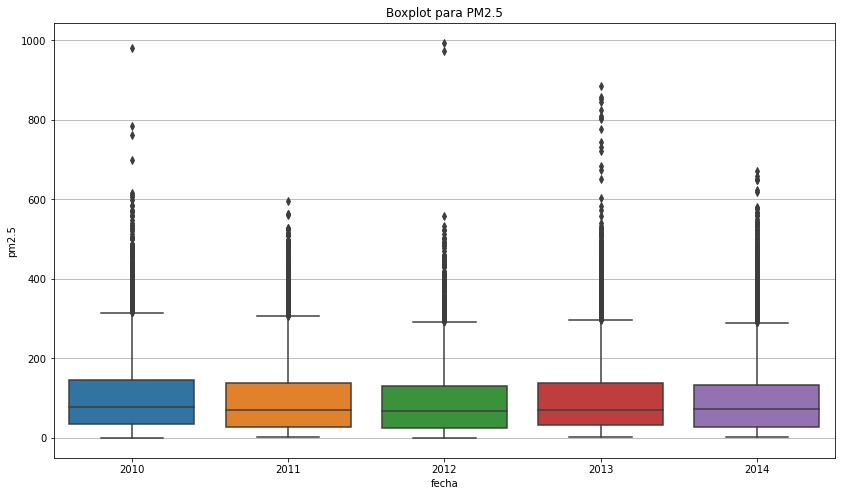

In [12]:
# Crear la figura de boxplot para pm2.5
plt.figure(figsize=(14,8))
ax = sbn.boxplot(x=df.index.year, y="pm2.5", data=df)
ax.set_title('Boxplot para PM2.5')
ax.yaxis.grid(True)

# Mostrar la figura
plt.show()

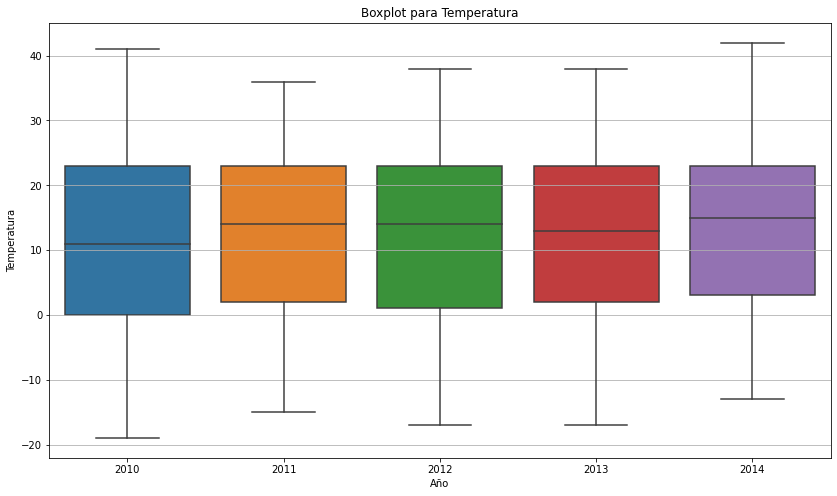

In [13]:
  # Crear la figura de boxplot para temperatura
plt.figure(figsize=(14,8))
ax = sbn.boxplot(x=df.index.year, y="TEMP", data=df)
ax.set(title='Boxplot para Temperatura', xlabel='Año', ylabel='Temperatura')
ax.yaxis.grid(True)

# Mostrar la figura
plt.show()

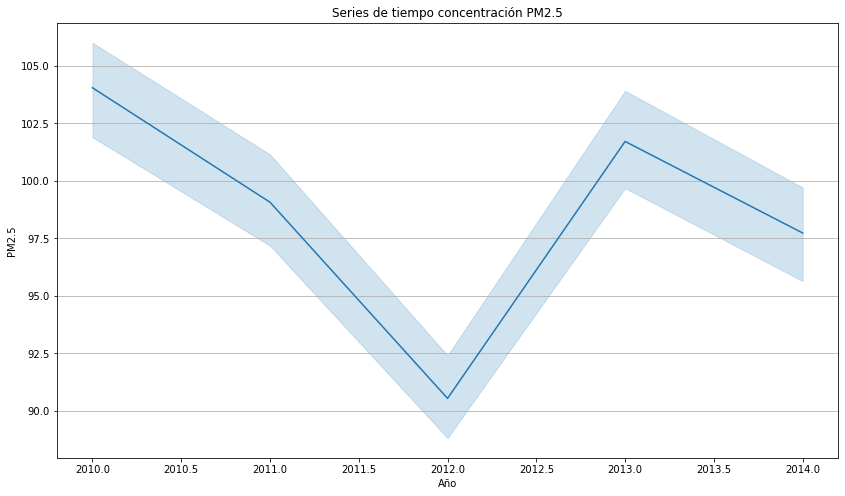

In [14]:
# Crear la figura de series de tiempo para PM2.5

plt.figure(figsize=(14,8))
ax = sbn.lineplot(x=df.index.year, 
                  y="pm2.5", data=df)
ax.set(title='Series de tiempo concentración PM2.5', xlabel='Año', ylabel='PM2.5')
ax.yaxis.grid(True)

# Mostrar la figura
plt.show()

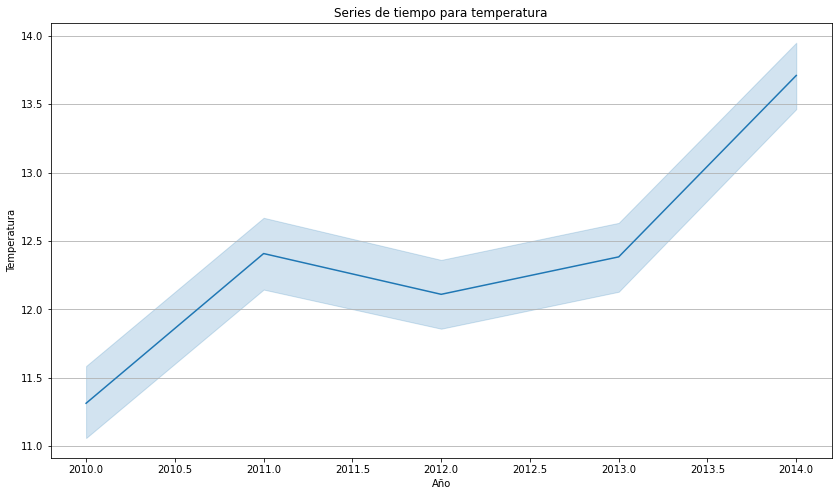

In [15]:
# Crear la figura de series de tiempo para TEMPE

plt.figure(figsize=(14,8))
ax = sbn.lineplot(x=df.index.year, 
                  y="TEMP", data=df)
ax.set(title='Series de tiempo para temperatura', xlabel='Año', ylabel='Temperatura')
ax.yaxis.grid(True)

# Mostrar la figura
plt.show()

### **Rta Punto 3:**

De acuerdo a la descripción y gráficos de boxplot y series de tiempo de las variables de PM2.5 y TEMPERATURA, se muestra que el rango Intercuartílico en los en los 5 años se comportan similar, incluyendo valores mínimos y máximos del rango. Sin embargo para el caso de PM2.5, se muestran valores extremos para los años 2010 y 2012, tema de investigación de dicho aumentodado que puede ser producido por el sensor o algunos agentes que han llevado a mayores valores de concentración PM2.5. 

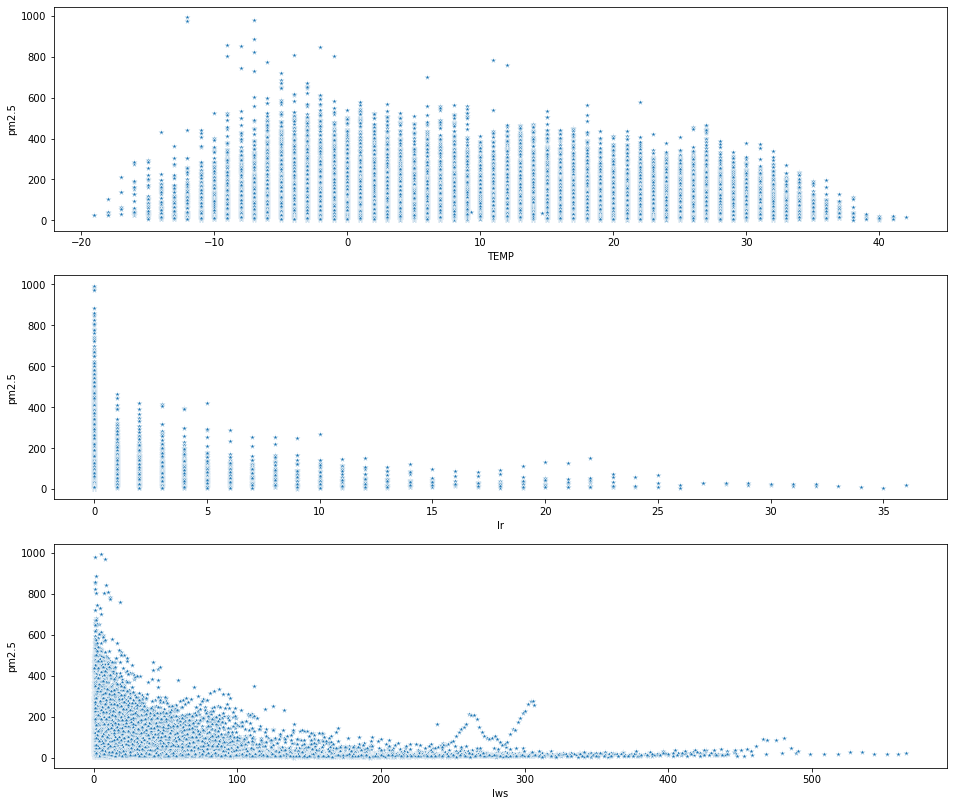

In [16]:
# Crear el gráfico de dispersión de PM2.5 con temperatura (TEMP), lluvia acumulada (Ir) y velocidad del viento (Iws) 

fig, axs = plt.subplots(3, figsize=(16, 14))
sbn.scatterplot(x="TEMP", y="pm2.5", data=df,  marker="*", ax=axs[0])
sbn.scatterplot(x="Ir", y="pm2.5", data=df,  marker="*", ax=axs[1])
sbn.scatterplot(x="Iws", y="pm2.5", data=df,  marker="*", ax=axs[2])
plt.show()

### **Rta Punto 4:**

De acuerdo a los gráficos de dispersión, se muestra que no hay nunguna correlación entre las variables de PM2.5 con temperatura, eso quiere decir que no es posible estimar el PM2.5 a partir de la temperatura. Sin embrago, graficando la disersión para velocidad del viento y lluvia acumumulada se encontró que si es posible encontrar una posible relación o modelo.

### **Rta Punto 5:**

Calcule la probabilidad de encontrar en la Base de datos el valor de pm2.5 encima de 120.

De acuerdo a los modelos seleccionados de Wibull_Min y Pareto, se encontró que la probabilidad es del 0.2989. 

In [17]:
## Calculo de de frecuencias de los datos de PM2.5

pm25 = df["pm2.5"].values # datos pm2.5 de DataFrame
mu = np.mean(pm25)
sigma  = np.std(pm25) # Distribución estandar

print("La media de PM2.5 es: ",mu)
print("La desviación Estandar de PM2.5 es: ",sigma)

La media de PM2.5 es:  98.61321455085375
La desviación Estandar de PM2.5 es:  92.04928496759753


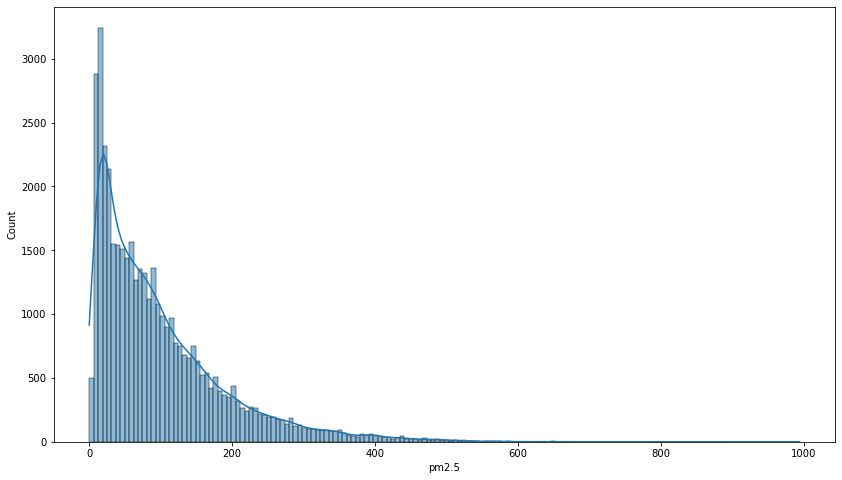

In [18]:
## Histograma de frecuencia de PM2.5

plt.figure(figsize=(14,8))
sbn.histplot(data=df, x="pm2.5", kde=True)
plt.show()

## Función de calculo de frecuencias de los datos

def ConteoFrecuencia(lista):
  """Calcula la frecuencia dado un valor"""
  freq = dict()
  for elem in lista:
    if (elem in freq):
      freq[elem] += 1
    else:
      freq[elem] = 1
  return freq 

freq_pm25 = ConteoFrecuencia(pm25)

In [26]:
## Calcular la probabilidad de que el valor sea mayor de 120 

freq_gt_120 = [value for index, value in freq_pm25.items() if index > 120]

long_pm25 = len(pm25)
long_gt_120 = sum(freq_gt_120)

print("*"*80)
print("Dimensiones de la frecuencia de PM2.5: {} y valores mayores de 120: {}".format(long_pm25, long_gt_120))
prob_freq_gt_120 = long_gt_120 / long_pm25
print("La probabilidad de encontrar un valor mayor de 120 es: ", prob_freq_gt_120)
print("*"*80)

********************************************************************************
Dimensiones de la frecuencia de PM2.5: 41757 y valores mayores de 120: 12483
La probabilidad de encontrar un valor mayor de 120 es:  0.2989438896472448
********************************************************************************


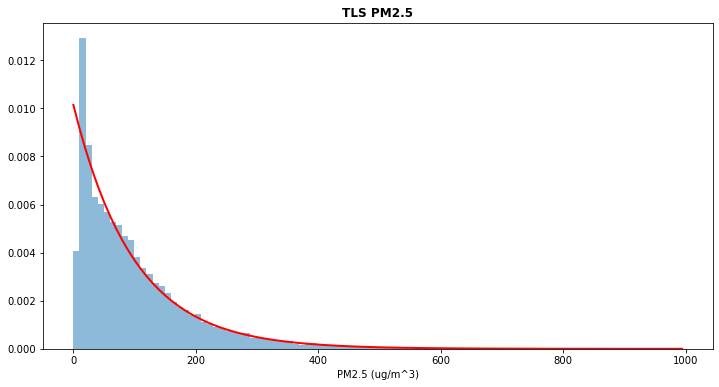

La probabilidad de encontrar un valor encima de 120 es:  0.2961540704796475


In [27]:
# Realizar el mismo proceso con exploración de modelos de probabilidad y buscar el mejor modelo de acuerdo a la distribución de los datos
import scipy
import numpy

plt.figure(figsize=(12,6))
pm25 = df["pm2.5"]
p0, p1 = scipy.stats.expon.fit(pm25, floc=0)
plt.hist(pm25, bins=100, density=True, alpha=0.5)
support = numpy.linspace(pm25.min(), pm25.max(), 100)
plt.plot(support, scipy.stats.expon.pdf(support, p0, p1), "r-", lw=2)
plt.title("TLS PM2.5", weight="bold")
plt.xlabel("PM2.5 (ug/m^3)")
plt.show()
print("La probabilidad de encontrar un valor encima de 120 es: ", 1-scipy.stats.expon.cdf(120, p0, p1))

### **Rta Punto 6:**

Para finalizar, agrupe por año el valor de la variable "pm2.5", calcule el promedio y ordene la base de datos de manera ascendente por el promedio.


In [28]:
## Calculo de PM2.5 por medias y organizar por valores

print("*"*30)
print("Calcular los valotes medias PM2.5")
print("*"*30)
pm25_medias = df.groupby(['year'])['pm2.5'].mean().sort_values()
display(pm25_medias)

print("*"*30)
print("Calcular los mínimos PM2.5")
print("*"*30)
pm25_minimos = df.groupby(['year'])['pm2.5'].min().sort_values()
display(pm25_minimos)

print("*"*30)
print("Calcular los máximos PM2.5")
print("*"*30)
pm25_maximos = df.groupby(['year'])['pm2.5'].max().sort_values()
display(pm25_maximos)

******************************
Calcular los valotes medias PM2.5
******************************


year
2012     90.545871
2014     97.734557
2011     99.071340
2013    101.712376
2010    104.045730
Name: pm2.5, dtype: float64

******************************
Calcular los mínimos PM2.5
******************************


year
2012    0.0
2010    1.0
2011    2.0
2013    2.0
2014    2.0
Name: pm2.5, dtype: float64

******************************
Calcular los máximos PM2.5
******************************


year
2011    595.0
2014    671.0
2013    886.0
2010    980.0
2012    994.0
Name: pm2.5, dtype: float64

## Referencias bibliográficas


* Alvaro Montenero, Daniel Montenegro et al. Notas de clase del Diplomado en Inteligencia Artificial y Aprendizaje Profundo. Consultado el: 30 de marzo de 2021. Recuperado en: https://github.com/AprendizajeProfundo/Diplomado

* Raul E. Lopez Briega. *Distribuciones de probabilidad con Python*. Consultado el 4 de abril de 2021. Recuperado de: https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/

* Eric Marsden. *Analyzing weather data*. Consultado el 3 de abril de 2021. Recuperado en: https://risk-engineering.org/notebook/data-analysis-weather.html